Epoch 0: Loss = 0.6932, Accuracy = 0.39
Epoch 100: Loss = 0.6839, Accuracy = 0.58
Epoch 200: Loss = 0.6808, Accuracy = 0.58
Epoch 300: Loss = 0.6785, Accuracy = 0.58
Epoch 400: Loss = 0.6721, Accuracy = 0.58
Epoch 500: Loss = 0.6498, Accuracy = 0.58
Epoch 600: Loss = 0.5895, Accuracy = 0.58
Epoch 700: Loss = 0.4914, Accuracy = 0.72
Epoch 800: Loss = 0.3869, Accuracy = 0.90
Epoch 900: Loss = 0.2937, Accuracy = 0.94
Epoch 1000: Loss = 0.2232, Accuracy = 0.97


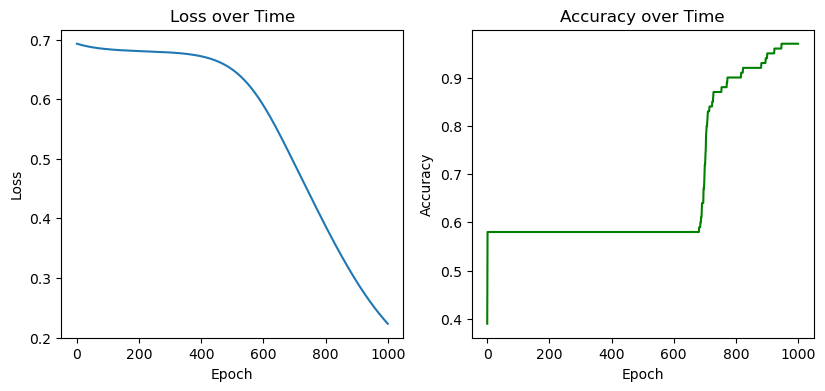

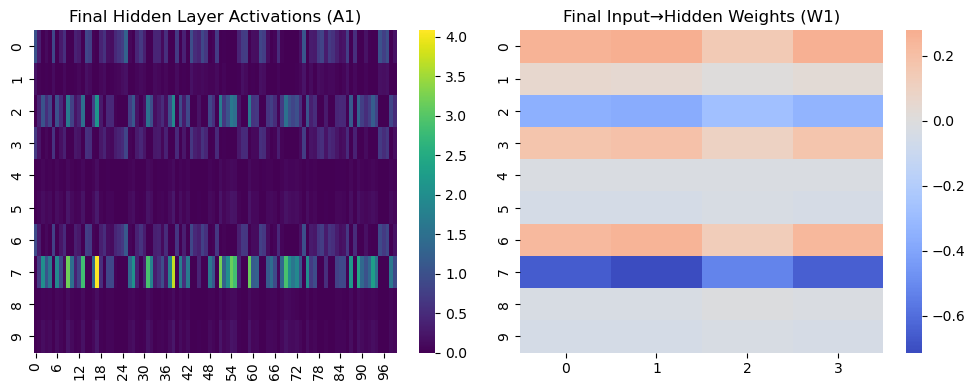

In [16]:
import numpy as np
from NN import NeuralNet
import seaborn as sns
from matplotlib import pyplot as plt

# Generate dummy data (e.g., 4 input features, 100 samples)
X = np.random.randn(4, 100)
# 4 rows, 100 columns 

#    event data ... 
# E1 ...
# E2 ...
# E3 ...
# E4 ...

# if the sum of features is > 0, set Y to 1
y = (np.sum(X, axis=0, keepdims=True) > 0).astype(float)
model = NeuralNet(input_size=4, hidden_size=10)

losses = []
accuracies = []
weight_norms = []
epochs = 1001
learning_rate = 0.025

for epoch in range(epochs):
    y_pred = model.forward(X)
    loss = model.loss(y)
    model.back_prop(X, y, learning_rate=learning_rate)

    # Log metrics
    losses.append(loss)
    acc = np.mean((y_pred > 0.5) == y)
    accuracies.append(acc)
    weight_norms.append(np.linalg.norm(model.W1))

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.2f}")

# --- Plotting ---
plt.figure(figsize=(15, 4))

# Loss
plt.subplot(1, 3, 1)
plt.plot(losses, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Time")

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(accuracies, label="Accuracy", color="green")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Time")

# --- Optional Heatmaps at Final Epoch ---
plt.figure(figsize=(10, 4))

# Activations heatmap (A1)
plt.subplot(1, 2, 1)
sns.heatmap(model.A1, cmap="viridis")
plt.title("Final Hidden Layer Activations (A1)")

# Weights heatmap (W1)
plt.subplot(1, 2, 2)
sns.heatmap(model.W1, cmap="coolwarm", center=0)
plt.title("Final Input→Hidden Weights (W1)")

plt.tight_layout()
plt.show()
